In [ ]:
!pip install catboost
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=0de28d9bbac958633fbfb569b7577082ed539f37f95b678e92c9ce4ebc4c5b07
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa0

# **1. Objective**

Predicting the Titanic spaceship passengers where Transported to their specific destination or not with the help of records that found in damaged computer systems.


---


# 2. ***Importing Neccessary Libraries***

---



In [ ]:
# Import Libsraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Models
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# 3. ***Loading the Datasets***

---



In [ ]:
# kaggle Datasets loading code uncomment it when needed
'''df_train = pd.read_csv('../input/spaceship-titanic/train.csv')
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')

df_train.head()'''

"df_train = pd.read_csv('../input/spaceship-titanic/train.csv')\ndf_test = pd.read_csv('../input/spaceship-titanic/test.csv')\n\ndf_train.head()"

In [ ]:
# Mounting gdrive to load the datasets through Gcollab notebooks
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the train and test datasets from drive folder path
df_train = pd.read_csv('/content/drive/MyDrive/Titanic_Spaceship_Disaster.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Titanic_Spaceship_Disaster_test.csv')

# Preview the data
df_train.head(5)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Feature Present in the train dataset**

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.
**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict

# 4. ***Data Exploration***

---



In [ ]:
# 4.1 Shape of the datatsets
print('The Training data contains --> ',df_train.shape, 'entities and columns')
print('The Training data contains --> ',df_test.shape, 'entities and columns')



The Training data contains -->  (8693, 14) entities and columns
The Training data contains -->  (4277, 13) entities and columns


In [ ]:
# 4.2 information about the df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# 4.3 descriptive stats about the df
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
# 4.4 check missing values(null,NaN,None) present in each and every columns
print(df_train.isna().sum().nlargest(df_train.shape[1]))
print(df_test.isna().sum().nlargest(df_test.shape[1]))


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


In [ ]:
# 4.5 check duplicate values
print(f'Duplicates in train set: {df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),1)}%)')


Duplicates in train set: 0, (0.0%)


In [ ]:
# 4.6 Cardinality to figure unique values
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
# 4.7 df datatypes and Feature names
print('Datatypes Present on the Dataframe \n')
print(df_train.dtypes)
print('\n\n------------------------------------------------------------------------')
print('Columns Present in the train dataframe\n')
train_columns = list(df_train.columns)
print(train_columns)

Datatypes Present on the Dataframe 

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


------------------------------------------------------------------------
Columns Present in the train dataframe

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


### 4.1.1 Insights



**OBSERVATIONS**


1.   In the train dataset, 8693 entites and 13 columns present.No duplicates present on both the train and test datasets.Null values present in most of the columns cannot eliminate all of it lead to data loss. So for numeric features fill the columns value with mean,median,mode and categorical features filled with closest nearby values can be determine by using miceforest method.
2.   Datatypes - Int & float(Numeric), Object(Categorical).
3.   Some columns are high on cardinality let's see how to reduce the cardinality level.
4.   Null values and NaN values are present in the dataset. Preprocessing needed.
5.   Binary columns - CryoSleep,Transported,VIP (Hot encoding needs to be done).
6.   Features -
    
    Continuous - 6
    Categorical - 4
    Descriptive / Qualitative - 3










# ***5. Data Visualisation***

---



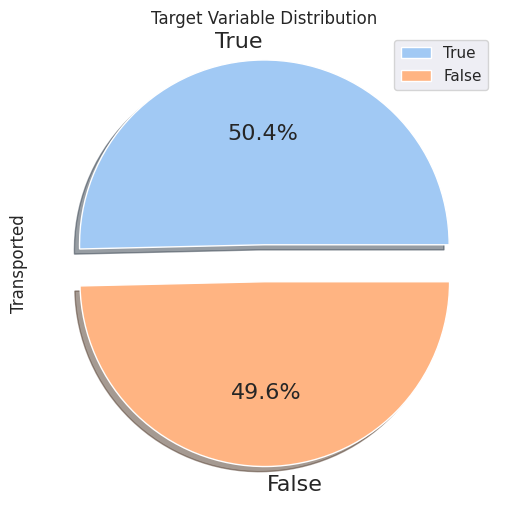

In [ ]:
# Visualize the Target variable Distribution
plot = df_train['Transported'].value_counts().plot.pie(colors = colors,explode=[0.1,0.1], autopct='%1.1f%%', textprops={'fontsize':16,},
    title = 'Target Variable Distribution', shadow = True, figsize=(6, 6))
plt.legend()
plt.show()



The Target variable more likely balanced with very less marginal difference,
it's makes our model building very easy without consisdering techniques like OverSampling / UnderSampling.


---



**Oversampling** - A technique in data analysis and machine learning that increases the number of instances in the minority class to address imbalanced datasets, improving the model's ability to accurately predict the minority class.

**Undersampling** - A technique in data analysis and machine learning that reduces the number of instances in the majority class to address imbalanced datasets, aiming to balance the representation of classes and prevent bias towards the majority class during model training.





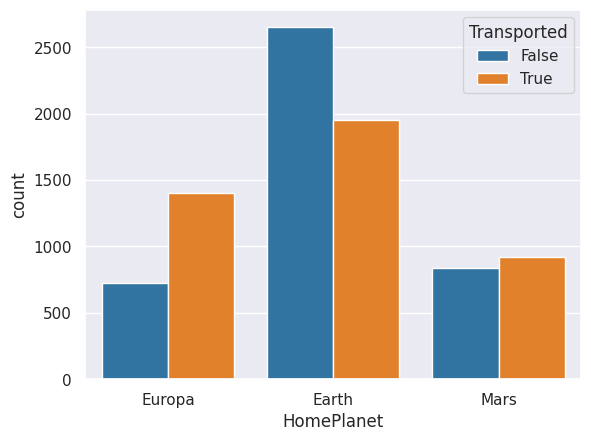

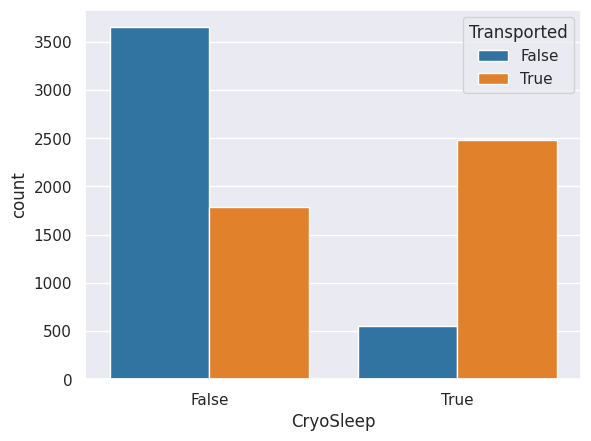

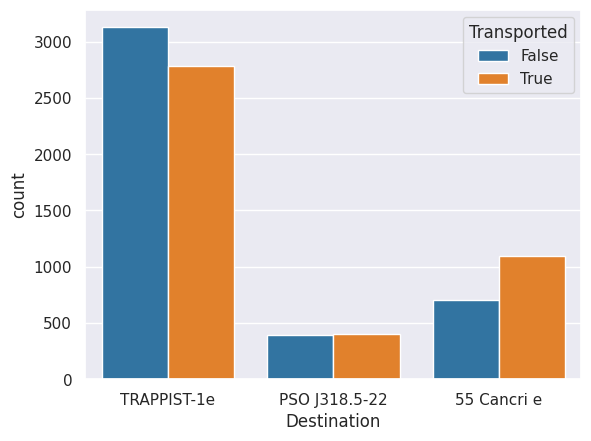

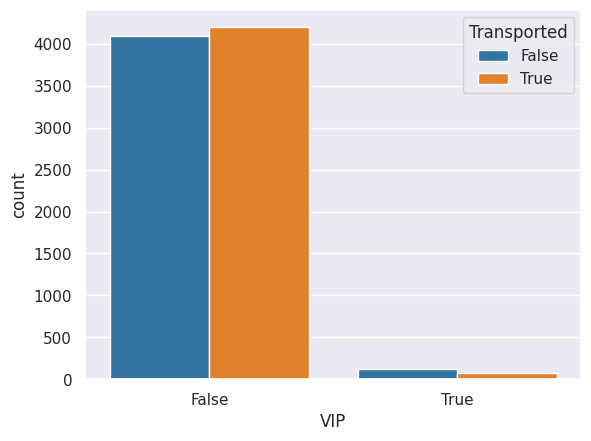

In [ ]:
cat_list = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for feat in cat_list:
    sns.countplot(x=feat, hue='Transported', data=df_train,)
    plt.show()

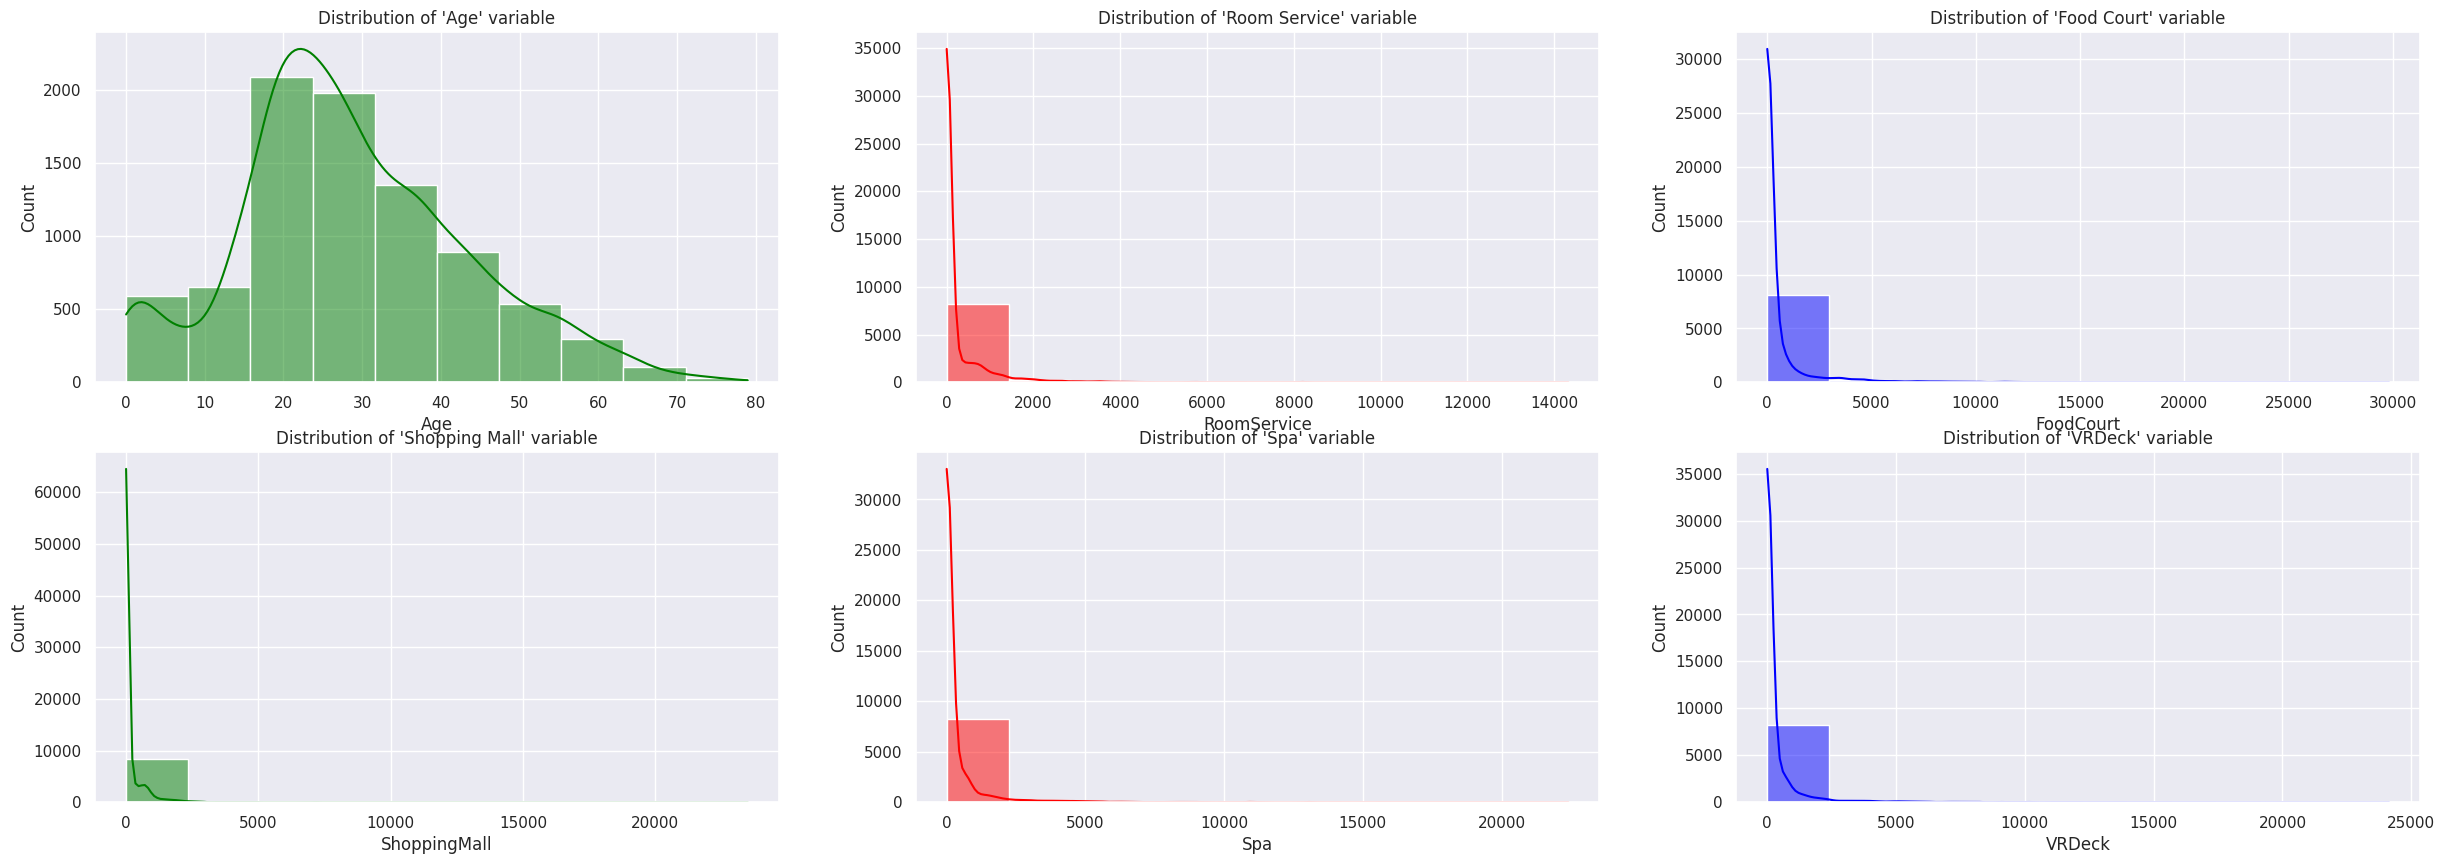

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
axes = axes.flatten()
sns.histplot(ax = axes[0], x = df_train["Age"],
             bins = 10,
             kde = True,
             color = 'g').set(title = "Distribution of 'Age' variable");

sns.histplot(ax = axes[1], x = df_train["RoomService"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'Room Service' variable");

sns.histplot(ax = axes[2], x = df_train["FoodCourt"],
             bins = 10,
             kde = True,
             color = "b").set(title = "Distribution of 'Food Court' variable");

sns.histplot(ax = axes[3], x = df_train["ShoppingMall"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'Shopping Mall' variable");

sns.histplot(ax = axes[4], x = df_train["Spa"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'Spa' variable");

sns.histplot(ax = axes[5], x = df_train["VRDeck"],
             bins = 10,
             kde = True,
 color = "b").set(title = "Distribution of 'VRDeck' variable");



*By observing the histogram graph with above features only column Age equally distributed rest all of the features are not equally distributed*

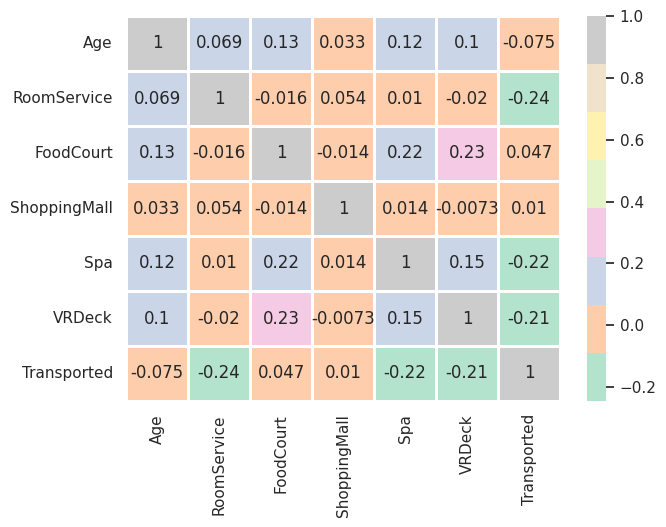

In [ ]:
plt.figure(figsize = [7,5], clear = True, facecolor = 'white')
sns.heatmap(df_train.corr(), annot = True, square = False, linewidths = 2,
            linecolor = "white", cmap = "Pastel2");

### Visualization by using AutoVIZ


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
av = AutoViz_Class()
chart_size = (10,6)
dftc = av.AutoViz(filename = '', sep = '', dfte = df_train,chart_format='png')

# Set the chart size
fig = plt.gcf()  # Get the current figure
fig.set_size_inches(5,5)  # Set the width and height in inches

# Display the charts
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 6. Feature Engineering

---



In [ ]:
# Creating a new feature Total spent = Room Service+FoodCourt+ShoppingMall+Spa+VRdeck
df_train['total_spent'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa']+ df_train['VRDeck']

df_test['total_spent'] = df_test['RoomService'] +df_test['FoodCourt'] + df_test['ShoppingMall'] +df_test['Spa']+df_test['VRDeck']

In [ ]:
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
df_train[['Deck','Num','Side']] = df_train.Cabin.str.split('/',expand=True)
df_test[['Deck','Num','Side']] = df_test.Cabin.str.split('/',expand=True)

In [ ]:
# Create a Age Group with a difference of 10 Years Age gap
df_train['AgeGroup'] = 0
for i in range(6):
    df_train.loc[(df_train.Age >= 10*i) & (df_train.Age < 10*(i + 1)), 'AgeGroup'] = i
# Same for test data
df_test['AgeGroup'] = 0
for i in range(6):
    df_test.loc[(df_test.Age >= 10*i) & (df_test.Age < 10*(i + 1)), 'AgeGroup'] = i

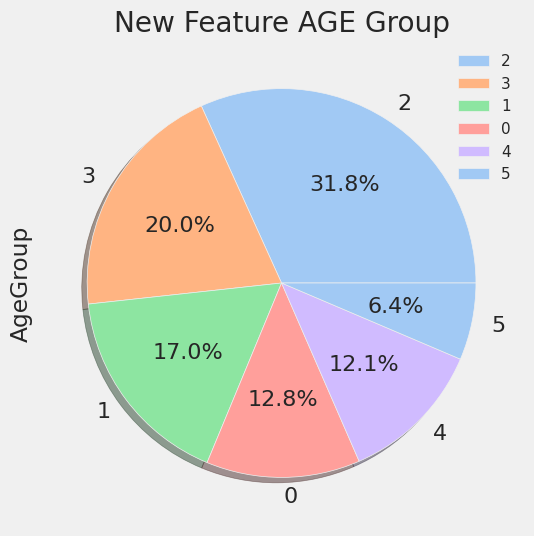

In [ ]:
plot = df_train['AgeGroup'].value_counts().plot.pie(colors = colors, autopct='%1.1f%%', textprops={'fontsize':16,},
    title = 'New Feature AGE Group', shadow = True, figsize=(6, 6))
plt.legend()
plt.show()

# 7. Preprocessing

---



In [ ]:
#Setting passengerID as Index
df_train.set_index('PassengerId',inplace=True)
df_test.set_index('PassengerId',inplace=True)

In [ ]:
# Filling Na Values

# Filling RoomService, Food Court, Shopping Mall, Spa, VRDeck - with 0
df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

df_train['Age'] =df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] =df_test['Age'].fillna(df_test['Age'].median())

df_train['VIP'] =df_train['VIP'].fillna(False)
df_test['VIP'] =df_test['VIP'].fillna(False)

df_train['HomePlanet'] =df_train['HomePlanet'].fillna('Mars')
df_test['HomePlanet'] =df_test['HomePlanet'].fillna('Mars')

df_train['Destination']=df_train['Destination'].fillna("PSO J318.5-22")
df_test['Destination']=df_test['Destination'].fillna("PSO J318.5-22")

df_train['CryoSleep'] =df_train['CryoSleep'].fillna(False)
df_test['CryoSleep'] =df_test['CryoSleep'].fillna(False)

df_train['Cabin'] =df_train['Cabin'].fillna('T/0/P')
df_test['Cabin'] =df_test['Cabin'].fillna('T/0/P')

In [ ]:
# Encoding the Categorical features
categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP', 'Destination','Deck','Side','Num']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((df_train[i], df_test[i])).astype(str)
    le.fit(arr)
    df_train[i]=le.transform(df_train[i].astype(str))
    df_test[i]=le.transform(df_test[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Destination
Deck
Side
Num


In [ ]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_spent,Deck,Num,Side,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1,0,0,3
0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,5,0,1,2
0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0,0,1,5
0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0,0,1,3
0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,5,1,1,1




### 7.1 Dropping Unneccessary Features




In [ ]:
# dropping Name & Cabin from dataframe
df_train= df_train.drop(['Name','Cabin'],axis=1)
df_test= df_test.drop(['Name','Cabin'],axis=1)

In [ ]:
# Setting up Transported value as 0 & 1
df_train['Transported']=df_train['Transported'].replace({True:1,False:0})

In [ ]:
X = df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [ ]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spent', 'Deck',
       'Num', 'Side', 'AgeGroup'],
      dtype='object')

### 7.2 Splitting Dataset as Train, Validation set

In [ ]:
# Splitting the train & test data using train_test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_val.shape,y_train.shape, y_val.shape)

(6085, 15) (2608, 15) (6085,) (2608,)


### 7.3 Model Building -- CATBOOST CLASSIFIER

Categorical Boosting (CatBoost): CatBoost is an open source algorithm based on gradient boosted decision trees. It supports numerical, categorical and text features. It works well with heterogeneous data and even relatively small data. Informally, it tries to take the best of both worlds from XGBoost and LGBM.

In [ ]:
# Define classifier
classifiers = {
    'CatBoost': CatBoostClassifier(random_state=10)
}

In [ ]:
# Grids for Grid search
boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

In [ ]:
grid = {
    "CatBoost" : boosted_grid,
}

In [ ]:
# Model Creation
model=CatBoostClassifier(random_state=10,iterations=1500,eval_metric='Accuracy',verbose=0)

In [ ]:
# Fit the model
model.fit(X_train,y_train)

In [ ]:
# Predict
pred_y=model.predict(X_val)

pred=model.predict(X_train)

print('The Accuracy Score of the CatBoost Classifier for Training Set is - ',accuracy_score(y_train.values,pred))
print('The Accuracy Score of the CatBoost Classifier for Testing Set is - ',accuracy_score(y_val.values,pred_y))

The Accuracy Score of the CatBoost Classifier for Training Set is -  0.8803615447822515
The Accuracy Score of the CatBoost Classifier for Testing Set is -  0.8113496932515337
